In [584]:
%load_ext autoreload
%autoreload 2
import sys
# sys.path.append("D:/Github/note/module")                        # for windows
sys.path.append("/Users/xinc./Documents/GitHub/note/module")    # for mac
from get_info_FinMind import GetInfoFinMind
import pandas as pd
import numpy as np
from typing import Any
import matplotlib
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# function

In [ ]:
def plot(
        df: pd.DataFrame,
        ly: str,                              # 左邊 y 軸資料
        x: str = "index",                     # x 軸的資料
        ry: str | None = None,                # 右邊 y 軸資料
        max_ly: bool = False,                 # 畫左邊 y 最大值
        min_ly: bool = False,                 # 畫左邊 y 最小值
        max_ry: bool = False,                 # 畫右邊 y 最大值
        min_ry: bool = False,                 # 畫右邊 y 最小值
        point_ly: float | None = None,        # 用數值找到左 y 資料位置
        point_ry: float | None = None,        # 用數值找到右 y 資料位置
        point_pct_ly: float | None = None,    # 用百分位數找到左 y 資料位置
        point_pct_ry: float | None = None     # 用百分位數找到左 y 資料位置
):
    if len(df) == 0:
        return {}
    
    # 定義 x 軸
    if x == "index":
        x_vals = pd.Series(
            np.arange(len(df), dtype = float) / max(len(df), 1),
            index = df.index,
            name = "x"
        )
        x_label = "sample proportion"
    else:
        x_vals = df[x]
        x_label = x

    fig, ax1 = plt.subplots(figsize = (16, 5))

    # ----------- 定義 ly 軸 -----------
    left_y = df[ly].astype(float)
    ax1.plot(x_vals, left_y, label = ly, color = "tab:blue")
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(ly, color = "tab:blue")
    ax1.tick_params(axis = "y", labelcolor = "tab:blue")

    mark: dict[str, Any] = {
        "max_ly": None,
        "min_ly": None,
        "max_ry": None,
        "min_ry": None,
        "point_ly": None,
        "point_ry": None
    }

    # 標記 max ly
    if max_ly and len(left_y) > 0:
        max_pos = int(np.argmax(left_y))
        max_idx = left_y.index[max_pos]
        max_x = x_vals.loc[max_idx]
        max_y = left_y.loc[max_idx]
        percent = float(max_x) * 100 if np.issubdtype(type(max_x), np.number) else np.nan
    
        ax1.scatter(max_x, max_y, color = "black", zorder = 5)
        ax1.axvline(max_x, color = "gray", linestyle = "--", linewidth = 1)
        ax1.annotate(
            f"{ly} max\nidx = {max_idx}\ny = {max_y:.4f}" + (f"\n({percent:.1f} %)" if np.isfinite(percent) else ""),
            xy = (max_x, max_y + (left_y.abs().max() * 0.05 or 1.0)),
            ha = "center",
            fontsize = 10,
            color = "black"
        )
        mark["max_ly"] = {
            "index": max_idx,
            "rank": max_pos + 1,
            "proportion": float(max_pos / len(left_y)),
            "x": float(max_x) if np.issubdtype(type(max_x), np.number) else None,
            "y": float(max_y)
        }

    # 標記 min ly
    if min_ly and len(left_y) > 0:
        min_pos = int(np.argmin(left_y))
        min_idx = left_y.index[min_pos]
        min_x = x_vals.loc[min_idx]
        min_y = left_y.loc[min_idx]
        percent = float(min_x) * 100 if np.issubdtype(type(min_x), np.number) else np.nan

        ax1.scatter(min_x, min_y, color = "black", zorder = 5)
        ax1.axvline(min_x, color = "gray", linestyle = "--", linewidth = 1)
        ax1.annotate(
            f"{ly} min\nidx = {min_idx}\ny = {min_y:.4f}" + (f"\n({percent:.1f} %)" if np.isfinite(percent) else ""),
            xy = (min_x, min_y),
            xytext = (min_x, min_y - (left_y.abs().max() * 0.05 or 1.0)),
            ha = "center",
            fontsize = 10,
            color = "black"
        )
        mark["min_ly"] = {
            "index": min_idx,
            "rank": min_pos + 1,
            "proportion": float(min_pos / len(left_y)),
            "x": float(min_x) if np.issubdtype(type(min_x), np.number) else None,
            "y": float(min_y)
        }

    # 標記 point ly
    if point_ly is not None or point_pct_ly is not None:
        if isinstance(point_ly, (str)):
            if point_ly.lower() == "max":
                pos = int(np.argmax(left_y))
            elif point_ly.lower() == "min":
                pos = int(np.argmin(left_y))
            else:
                raise ValueError("point_ly must be a number or 'max' or 'min'")
        elif point_pct_ly is not None:
            pct = float(point_pct_ly)
            if pct > 1:
                pct /= 100
            pct = min(max(pct, 0.0), 1.0)
            pos = int(round(pct * (len(df) - 1)))
        else:
            assert point_ly is not None
            diff_arr = (left_y - float(point_ly)).abs().to_numpy()
            pos = int(np.argmin(diff_arr)) # 取最接近的 index

        idx_ly = left_y.index[pos]
        px = x_vals.loc[idx_ly]
        py = left_y.loc[idx_ly]
        percent = float(pos / len(left_y) * 100.0)
        ax1.scatter(px, py, color = "black", zorder = 6)
        ax1.axvline(px, color = "black", linestyle = "--", linewidth = 1)
        ax1.annotate(
            f"{ly}\nidx = {idx_ly}\ny = {py:.4f}\n( {percent:.1f}  %)",
            xy = (px, py),
            xytext = (px, py + (left_y.abs().max() * 0.05 or 1.0)),
            ha = "center",
            fontsize = 10,
            color = "black"
        )
        mark["point_ly"] = {
            "index": idx_ly,
            "rank": pos + 1,
            "proportion": float(pos / len(left_y)),
            "x": float(px) if np.issubdtype(type(px), np.number) else None,
            "y": float(py)
        }

    # ----------- 定義 ry 軸 -----------
    ax2 = None
    if ry:
        right_y = df[ry].astype(float)
        ax2 = ax1.twinx()
        ax2.plot(x_vals, right_y, label = ry, color = "tab:red", linestyle = "--")
        ax2.set_ylabel(ry, color = "tab:red")
        ax2.tick_params(axis = "y", labelcolor = "tab:red")

        # 標記 max ry
        if max_ry and len(right_y) > 0:
            max_pos = int(np.argmax(right_y))
            max_idx = right_y.index[max_pos]
            max_x = x_vals.loc[max_idx]
            max_y = right_y.loc[max_idx]
            percent = float(max_x) * 100 if np.issubdtype(type(max_x), np.number) else np.nan

            ax2.scatter(max_x, max_y, color = "black", zorder = 5)
            ax2.axvline(max_x, color = "gray", linestyle = "--", linewidth = 1)
            ax2.annotate(
                f"{ry} max\nidx = {max_idx}\ny = {max_y:.4f}" + (f"\n{percent:.1f} %" if np.isfinite(percent) else ""),
                xy = (max_x, max_y),
                xytext = (max_x, max_y + (right_y.abs().max() * 0.05 or 1.0)),
                ha = "center",
                fontsize = 10,
                color = "black"
            )
            mark["max_ry"] = {
                "index": max_idx,
                "rank": max_pos + 1,
                "proportion": float(max_pos / len(right_y)),
                "x": float(max_x) if np.issubdtype(type(max_x), np.number) else None,
                "y": float(max_y)
            }
        
        if min_ry and len(right_y) > 0:
            min_pos = int(np.argmin(right_y))
            min_idx = right_y.index[min_pos]
            min_x = x_vals.loc[min_idx]
            min_y = right_y.loc[min_idx]
            percent = float(min_x) * 100 if np.issubdtype(type(min_x), np.number) else np.nan

            ax2.scatter(min_x, min_y, color = "black", zorder = 5)
            ax2.axvline(min_x, color = "gray", linestyle = "--", linewidth = 1)
            ax2.annotate(
                f"{ry} min\nidx = {min_idx}\ny = {min_y:.4f}" + (f"\n({percent:.1f} %)" if np.isfinite(percent) else ""),
                xy = (min_x, min_y),
                xytext = (min_x, min_y - (right_y.abs().max() * 0.05 or 1.0)),
                ha = "center",
                fontsize = 10,
                color = "black"
            )
            mark["min_ry"] = {
                "index": min_idx,
                "rank": min_pos + 1,
                "proportion": float(min_pos / len(right_y)),
                "x": float(min_x) if np.issubdtype(type(min_x), np.number) else None,
                "y": float(min_y)
            }

        if point_ry is not None or point_pct_ry is not None:
            assert point_ry is not None
            if isinstance(point_ry, (str)):
                if point_ry.lower() == "max":
                    pos = int(np.argmax(right_y))
                elif point_ry.lower() == "min":
                    pos = int(np.argmin(right_y))
                else:
                    raise ValueError("point_ry must be a number or 'max' or 'min'")
            elif point_pct_ry is not None:
                pct = float(point_pct_ry)
                if pct > 1:
                    pct /= 100
                pct = min(max(pct, 0.0), 1.0)
                pos = int(round(pct * (len(df) - 1)))
            else:
                diff_arr = (right_y - float(point_ry)).abs().to_numpy()
                pos = int(np.argmin(diff_arr))                                              # 取最接近的 index

            idx_ry = right_y.index[pos]
            px = x_vals.loc[idx_ry]
            py = right_y.loc[idx_ry]
            percent = float(pos / len(right_y) * 100.0)
            ax2.scatter(px, py, color = "black", zorder = 6)
            ax2.axvline(px, color = "black", linestyle = "--", linewidth = 1)
            ax2.annotate(
                f"{ry}\nidx = {idx_ry}\ny = {py:.4f}\n( {percent:.1f} %)",
                xy = (px, py),
                xytext = (px, py + (right_y.abs().max() * 0.05 or 1.0)),
                ha = "center",
                fontsize = 10,
                color = "black"
            )
            mark["point_ry"] = {
                "index": idx_ry,
                "rank": pos + 1,
                "proportion": float(pos / len(right_y)),
                "x": float(px) if np.issubdtype(type(px), np.number) else None,
                "y": float(py)
            }

    # ----------- 圖例 -----------
    lines, labels = ax1.get_legend_handles_labels()
    if ax2 is not None:
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc = "center left", bbox_to_anchor = (1.05, 0.5))
    else:
        ax1.legend(loc = "best")

    fig.text(0.98, 0.01, f"Sample size: {len(df)}", ha = "right", fontsize = 12, color = "gray")

    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return mark

# get data

In [435]:
FinMind_fetcher = GetInfoFinMind()
base_df = FinMind_fetcher.init_df("TX", "2015-01-01", "2025-09-17")
base_df = FinMind_fetcher.get_future_daily_info(trading_session = "position", weekly_group = True, monthly_group = True)
# after_df = FinMind_fetcher.init_df("TX", "2015-01-01", "2025-09-04")
# after_df = FinMind_fetcher.get_future_daily_info(trading_session = "after_market")
base_df.to_csv("TX.csv")
# after_df.to_csv("TX_after.csv")

2025-09-20 17:04:14.294 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanFuturesDaily, data_id: TX
/Users/xinc./Documents/GitHub/note/module/get_info_FinMind.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  """


# 週結算 target: wed

## read

In [561]:
base_df = pd.read_csv("TX.csv", index_col = "Timestamp")
base_df.index = pd.to_datetime(base_df.index, format = "%Y-%m-%d")

base_df

,futures_id,contract_date,weekly_group,monthly_group,Open,High,Low,Close,spread,spread_per,Volume,settlement_price,open_interest,trading_session
Timestamp,,,,,,,,,,,,,,
2015-01-05,TX,201501,2015-01-07,2015-01-21,9238.0,9276.0,9155.0,9252.0,-29.0,-0.31,120487.0,9250.0,63140.0,position
2015-01-06,TX,201501,2015-01-07,2015-01-21,9144.0,9153.0,9017.0,9058.0,-192.0,-2.08,148125.0,9058.0,59897.0,position
2015-01-07,TX,201501,2015-01-07,2015-01-21,9042.0,9092.0,9033.0,9045.0,-13.0,-0.14,93314.0,9044.0,60983.0,position
2015-01-08,TX,201501,2015-01-14,2015-01-21,9116.0,9259.0,9115.0,9257.0,213.0,2.36,131883.0,9256.0,65311.0,position
2015-01-09,TX,201501,2015-01-14,2015-01-21,9328.0,9335.0,9217.0,9230.0,-26.0,-0.28,117874.0,9230.0,61302.0,position
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-11,TX,202509,2025-09-17,2025-09-17,25386.0,25464.0,25176.0,25240.0,64.0,0.25,73339.0,25233.0,80304.0,position
2025-09-12,TX,202509,2025-09-17,2025-09-17,25418.0,25466.0,25350.0,25459.0,226.0,0.90,55444.0,25458.0,73194.0,position
2025-09-15,TX,202509,2025-09-17,2025-09-17,25404.0,25450.0,25269.0,25353.0,-105.0,-0.41,89375.0,25347.0,40730.0,position


## sum 跳空 ret

In [490]:
operate_df = pd.DataFrame()

temp_df = base_df.copy()
temp_df["cross_daily_ret"] = (temp_df["Open"] / temp_df["Close"].shift(1)) - 1


# t - 1 週 ret sumation
operate_df["sum_cross_ret"] = temp_df.groupby("weekly_group")["cross_daily_ret"].sum()

# t 週結算日報酬
operate_df["wed_ret"] = (temp_df["Close"] / temp_df["Open"]) - 1

# fill wed_ret NaN 順延下一個交易日
nan_idx = operate_df[operate_df["wed_ret"].isna()].index
for t in nan_idx:
    next_idx = temp_df.index[temp_df.index > t]
    next_date = next_idx[0] if len(next_idx) > 0 else None
    next_date = pd.to_datetime(next_date, format = "%Y-%m-%d") if next_date is not None else None
    ret = (temp_df.loc[next_date, "Close"] / temp_df.loc[next_date, "Open"]) - 1 if next_date is not None else np.nan
    operate_df.loc[t, "wed_ret"] = ret


# demeaning
mean = operate_df["wed_ret"].mean()
operate_df["demeaned_wed_ret"] = operate_df["wed_ret"] - mean
operate_df.to_csv("test.csv")

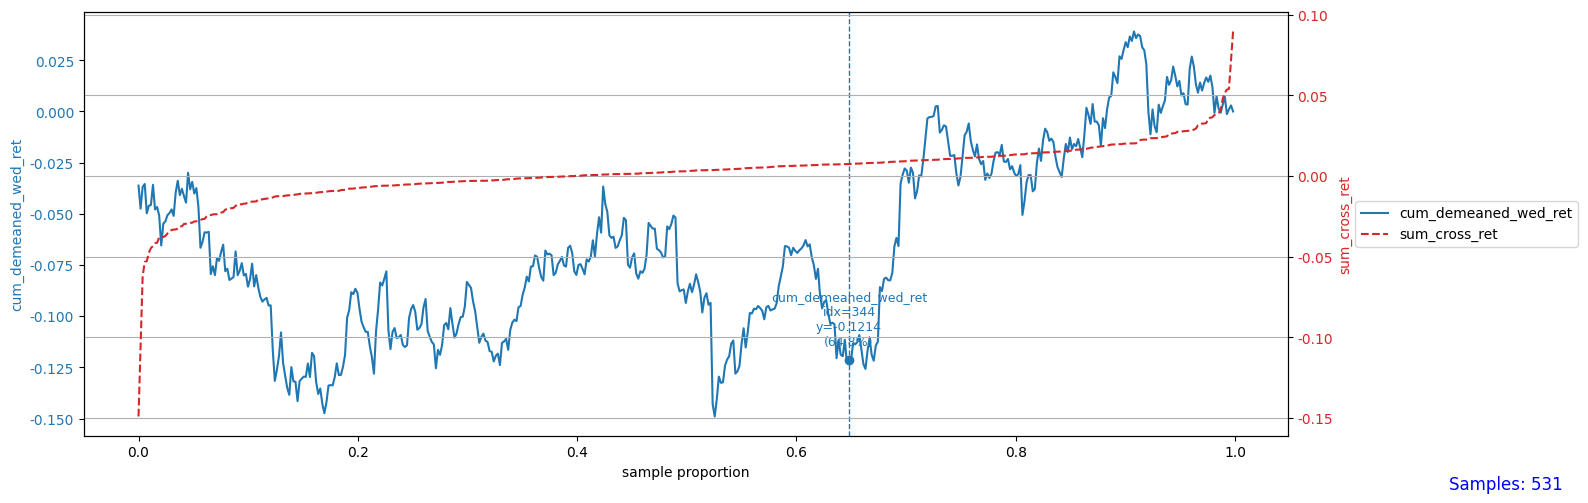

{'ly_max': None,
 'ly_point': {'index': 344,
  'rank': 345,
  'proportion': 0.647834274952919,
  'x': 0.647834274952919,
  'y': -0.12141591410463312},
 'ry_point': None}

In [491]:
"""sort & cumsum"""

operate_df.sort_values("sum_cross_ret", inplace = True)
operate_df.reset_index(drop = False, inplace = True)
operate_df["cum_demeaned_wed_ret"] = operate_df["demeaned_wed_ret"].cumsum()

sorted_plot(operate_df, "index", ly = "cum_demeaned_wed_ret", ry = "sum_cross_ret", point_ly_pct = 0.65)
# right idx: 344

In [492]:
"""seperate df & calculate mean"""
right_df = operate_df[344: ]
right_mean = right_df["demeaned_wed_ret"].mean()
print(f"right mean: {right_mean:.6f}")

right mean: 0.000657


## (main)! thu_open ~ wed_open, log +

In [606]:
operate_df = pd.DataFrame()

temp_df = base_df.copy()

# t - 1 月 ret
first_open = temp_df.groupby("weekly_group")["Open"].first()
settle_open = temp_df.groupby("weekly_group")["Open"].last()
operate_df["weekly_ret"] = (settle_open / first_open) - 1

# t 週結算日 ret
operate_df["wed_ret"] = (temp_df["Close"] / temp_df["Open"]) - 1

# demeaning
mean = operate_df["wed_ret"].mean()
operate_df["demeaned_wed_ret"] = operate_df["wed_ret"] - mean

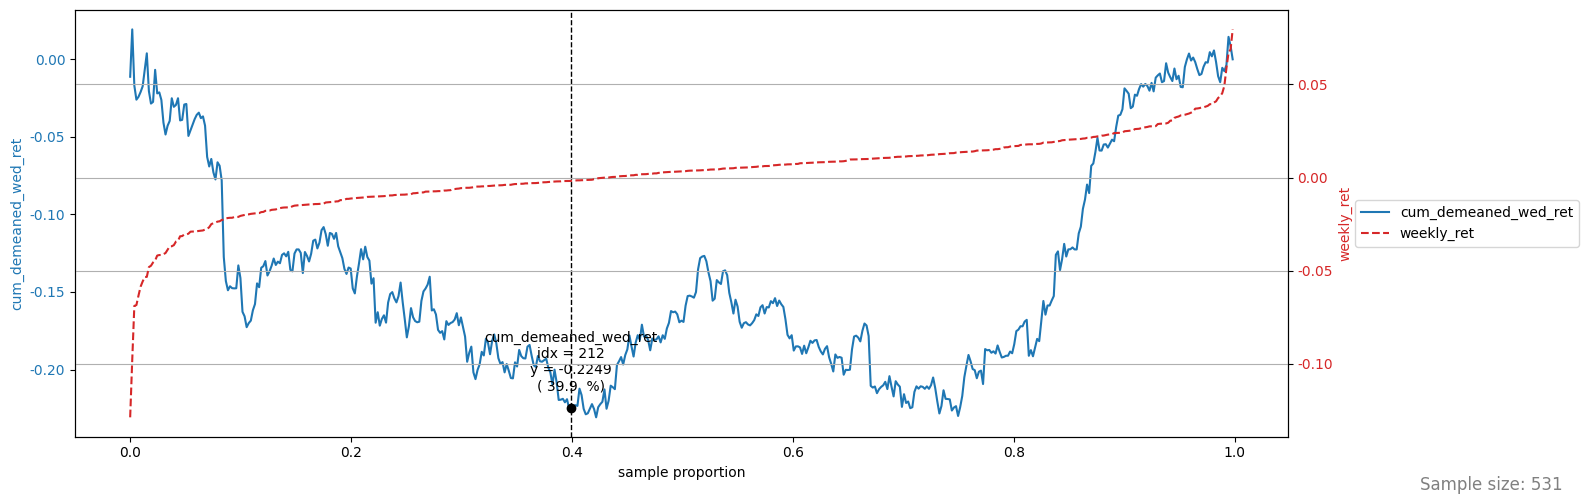

{'max_ly': None,
 'min_ly': None,
 'max_ry': None,
 'min_ry': None,
 'point_ly': {'index': 212,
  'rank': 213,
  'proportion': 0.3992467043314501,
  'x': 0.3992467043314501,
  'y': -0.22488013925044095},
 'point_ry': None}

In [607]:
"""sort & cumsum"""

operate_df.sort_values("weekly_ret", inplace = True)
operate_df.reset_index(drop = False, inplace = True)
operate_df["cum_demeaned_wed_ret"] = operate_df["demeaned_wed_ret"].cumsum()

plot(operate_df, ly = "cum_demeaned_wed_ret", x = "index", ry = "weekly_ret", point_pct_ly = 0.4)
# 兩個底的idx: 212(0.4), 398(0.75)

In [564]:
# seperate df
left_df = operate_df[: 212]
right_df = operate_df[398: ]

# calculate mean
left_mean, right_mean = left_df["demeaned_wed_ret"].mean(), right_df["demeaned_wed_ret"].mean()

print(f"left mean: {left_mean:.6f}, right mean: {right_mean:.6f}")

left mean: -0.001062, right mean: 0.001681


### add filter 跳空

In [565]:
# get previous idx
all_idx = temp_df.index
target_idx = operate_df.index
pos = np.searchsorted(all_idx, target_idx)
prev_idx = all_idx[pos - 1]

# calculate gap
gap = (temp_df["Open"].iloc[pos].values / temp_df["Close"].iloc[pos - 1].values) - 1
operate_df.sort_index(inplace = True)
operate_df["gap"] = gap

# resort operate
operate_df.sort_values("weekly_ret", inplace = True)

# seperate df
left_df = operate_df[: 212].copy()
right_df = operate_df[398: ].copy()

# sort by gap
left_df = left_df.sort_values("gap").reset_index(drop = False)
right_df = right_df.sort_values("gap").reset_index(drop = False)

# cumsum
left_df["cum_demeaned_wed_ret"] = left_df["demeaned_wed_ret"].cumsum()
right_df["cum_demeaned_wed_ret"] = right_df["demeaned_wed_ret"].cumsum()

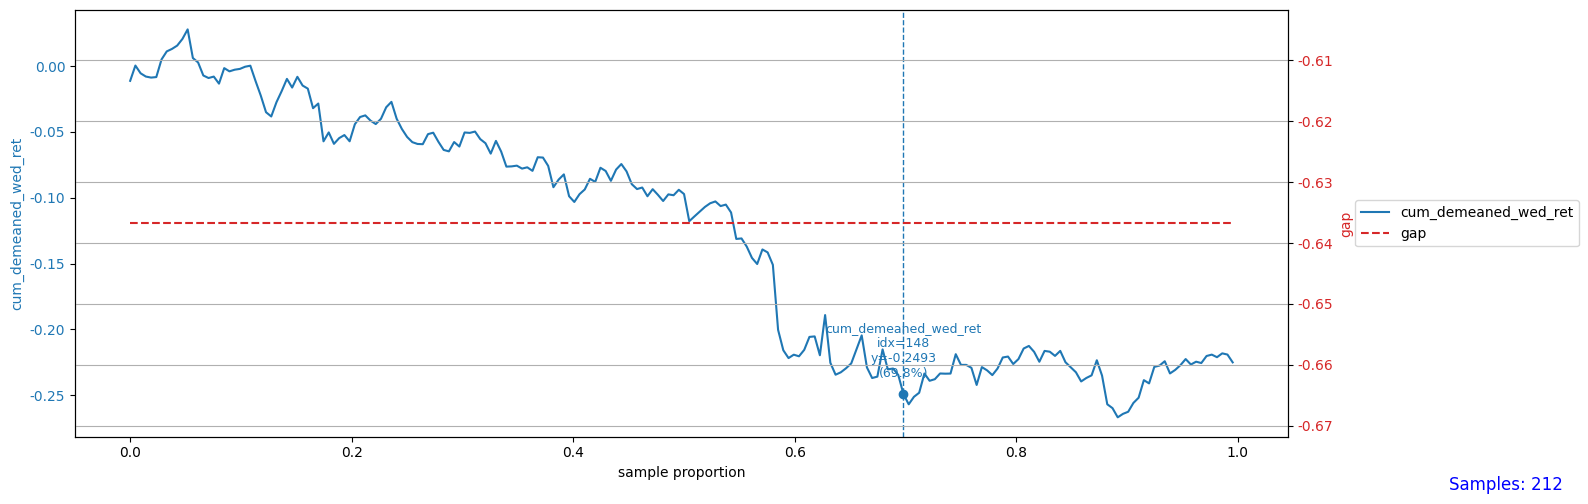

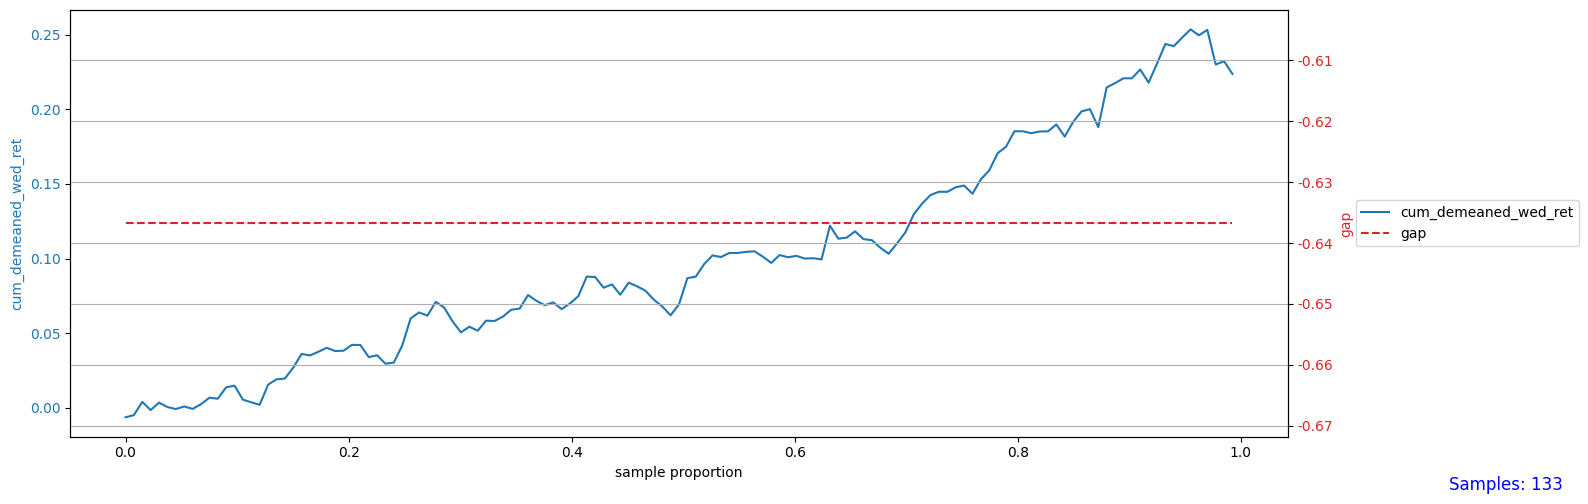

{'ly_max': None, 'ly_point': None, 'ry_point': None}

In [571]:
"""plot"""
sorted_plot(left_df, "index", ly = "cum_demeaned_wed_ret", ry = "gap", point_ly_pct = 0.7)
sorted_plot(right_df, "index", ly = "cum_demeaned_wed_ret", ry = "gap")

# filter left_df, : 148
# filter right_df, all

In [570]:
filtered_left_df = left_df[: 148]
filtered_right_df = right_df

filtered_mean_left = filtered_left_df["demeaned_wed_ret"].mean()
filtered_mean_right = filtered_right_df["demeaned_wed_ret"].mean()
print(f"filtered left mean: {filtered_mean_left:.6f}, filtered right mean: {filtered_mean_right:.6f}")

filtered left mean: -0.001585, filtered right mean: 0.001681


# 月結算 target: wed

## read

In [280]:
base_df = pd.read_csv("TX.csv", index_col = "Timestamp")
base_df.index = pd.to_datetime(base_df.index, format = "%Y-%m-%d")

## sum 跳空 ret

In [439]:
operate_df = pd.DataFrame()

temp_df = base_df.copy()
temp_df["cross_daily_ret"] = (temp_df["Open"] / temp_df["Close"].shift(1)) - 1

# t - 1 月 ret sum
operate_df["sum_cross_ret"] = temp_df.groupby("monthly_group")["cross_daily_ret"].sum()

# t 週結算日 ret
operate_df["wed_ret"] = (temp_df["Close"] / temp_df["Open"]) - 1

# fill wed_ret NaN 順延下一個交易日
nan_idx = operate_df[operate_df["wed_ret"].isna()].index
for t in nan_idx:
    next_idx = temp_df.index[temp_df.index > t]
    next_date = next_idx[0] if len(next_idx) > 0 else None
    next_date = pd.to_datetime(next_date, format = "%Y-%m-%d") if next_date is not None else None
    ret = (temp_df.loc[next_date, "Close"] / temp_df.loc[next_date, "Open"]) - 1 if next_date is not None else np.nan
    operate_df.loc[t, "wed_ret"] = ret

# demeaning
mean = operate_df["wed_ret"].mean()
operate_df["demeaned_wed_ret"] = operate_df["wed_ret"] - mean
operate_df.to_csv("test.csv")

In [440]:
"""sort & cumsum"""

operate_df.sort_values("sum_cross_ret", inplace = True)
operate_df.reset_index(drop = False, inplace = True)
operate_df["cum_demeaned_wed_ret"] = operate_df["demeaned_wed_ret"].cumsum()
operate_df

,monthly_group,sum_cross_ret,wed_ret,demeaned_wed_ret,cum_demeaned_wed_ret
0,2020-03-18,-0.190440,-0.010997,-0.010433,-1.043259e-02
1,2025-04-16,-0.071927,-0.002704,-0.002139,-1.257190e-02
2,2025-03-19,-0.071098,-0.012321,-0.011757,-2.432852e-02
3,2019-08-21,-0.067328,0.001332,0.001896,-2.243233e-02
4,2022-09-21,-0.065756,-0.005112,-0.004547,-2.697960e-02
...,...,...,...,...,...
124,2025-09-17,0.071574,-0.004813,-0.004248,7.350262e-03
125,2023-01-30,0.074094,-0.006877,-0.006313,1.037405e-03
126,2022-11-16,0.087433,-0.008276,-0.007712,-6.674295e-03
127,2020-08-19,0.089460,-0.007671,-0.007107,-1.378111e-02


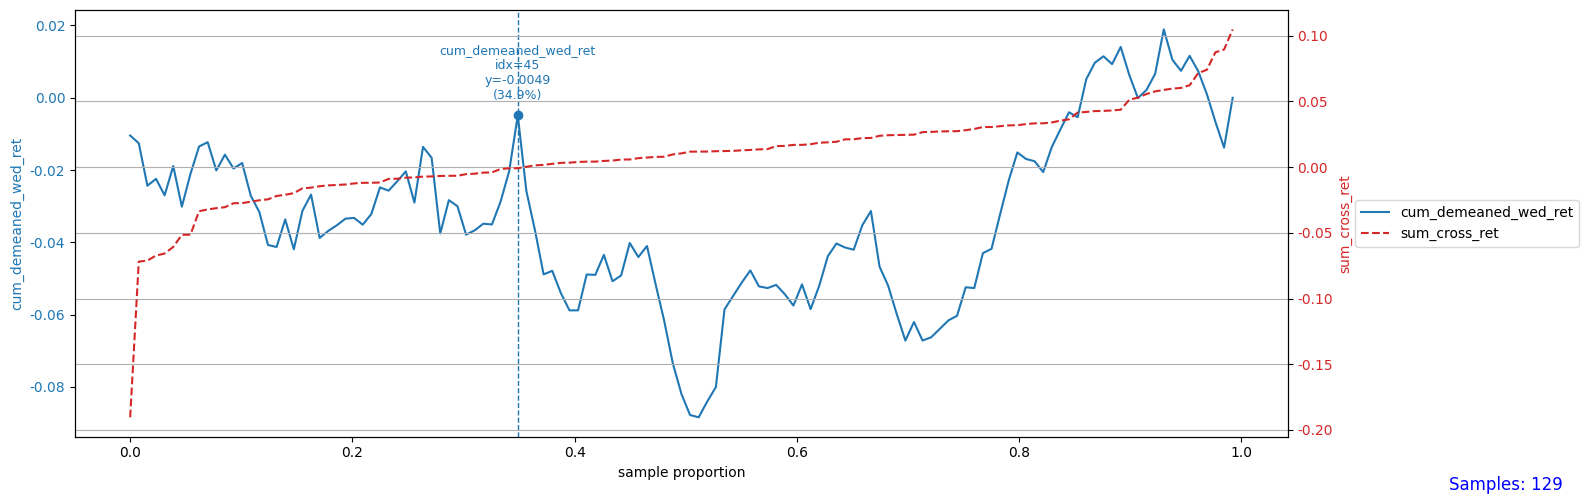

{'ly_max': None,
 'ly_point': {'index': 45,
  'rank': 46,
  'proportion': 0.3488372093023256,
  'x': 0.3488372093023256,
  'y': -0.004889899158323118},
 'ry_point': None}

In [441]:
sorted_plot(operate_df, "index", ly = "cum_demeaned_wed_ret", ry = "sum_cross_ret", point_ly_pct = 0.35)

## thu_open ~ wed_open log +

In [578]:
operate_df = pd.DataFrame()

temp_df = base_df.copy()

# t - 1 月 ret
first_open = temp_df.groupby("monthly_group")["Open"].first()
settle_open = temp_df.groupby("monthly_group")["Open"].last()
operate_df["monthly_ret"] = (settle_open / first_open) - 1

# t 週結算日 ret
operate_df["wed_ret"] = (temp_df["Close"] / temp_df["Open"]) - 1

# fill wed_ret NaN 順延下一個交易日
nan_idx = operate_df[operate_df["wed_ret"].isna()].index
for t in nan_idx:
    next_idx = temp_df.index[temp_df.index > t]
    next_date = next_idx[0] if len(next_idx) > 0 else None
    next_date = pd.to_datetime(next_date, format = "%Y-%m-%d") if next_date is not None else None
    ret = (temp_df.loc[next_date, "Close"] / temp_df.loc[next_date, "Open"]) - 1 if next_date is not None else np.nan
    operate_df.loc[t, "wed_ret"] = ret

# demeaning
mean = operate_df["wed_ret"].mean()
operate_df["demeaned_wed_ret"] = operate_df["wed_ret"] - mean

filtered_df = operate_df.copy()

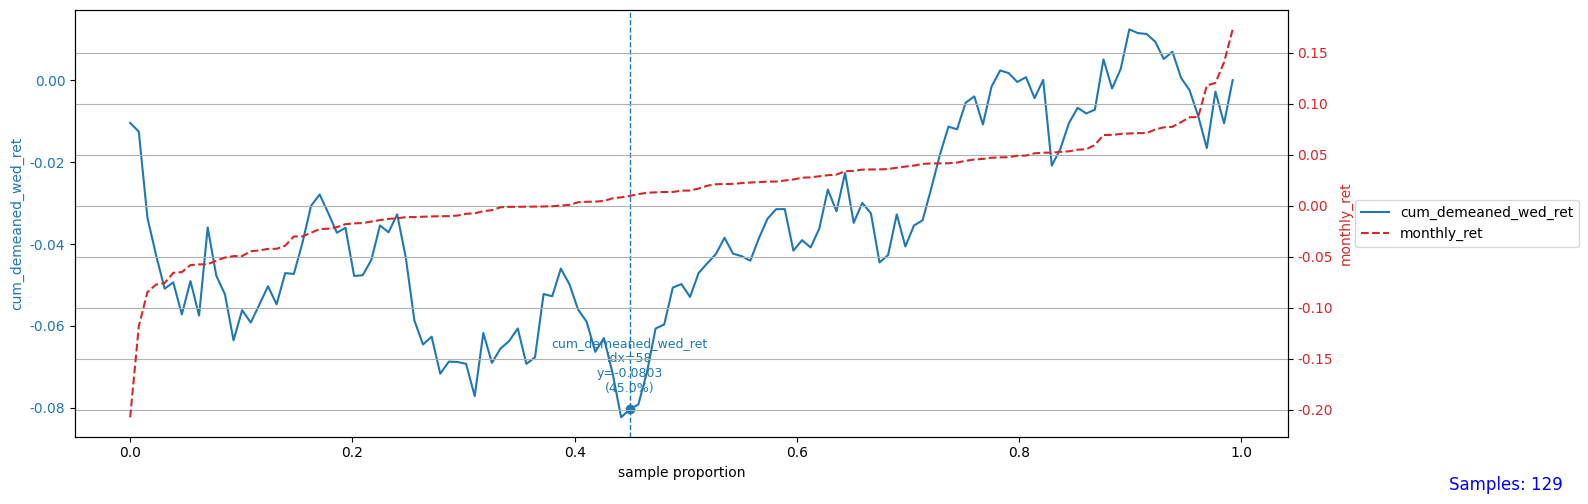

{'ly_max': None,
 'ly_point': {'index': 58,
  'rank': 59,
  'proportion': 0.4496124031007752,
  'x': 0.4496124031007752,
  'y': -0.08033828394348148},
 'ry_point': None}

In [576]:
"""sort & cumsum & plot"""

operate_df.sort_values("monthly_ret", inplace = True)
operate_df.reset_index(drop = False, inplace = True)
operate_df["cum_demeaned_wed_ret"] = operate_df["demeaned_wed_ret"].cumsum()

sorted_plot(operate_df, "index", ly = "cum_demeaned_wed_ret", ry = "monthly_ret", point_ly_pct = 0.45)

In [577]:
"""seperate df & calculate mean"""
right_df = operate_df[58: ].copy()
right_mean = right_df["demeaned_wed_ret"].mean()

print(f"right mean: {right_mean:.6f}")

right mean: 0.001159


### add filter 跳空

In [582]:
# get previous idx
all_idx = temp_df.index
target_idx = filtered_df.index
pos = np.searchsorted(all_idx, target_idx)
prev_idx = all_idx[pos - 1]

# calculate gap
gap = (temp_df["Open"].iloc[pos].values / temp_df["Close"].iloc[pos - 1].values) - 1
filtered_df["gap"] = gap

# split df
filtered_df.sort_values("monthly_ret", inplace = True)
right_df = filtered_df[58: ].copy()

# sort by gap
right_df = right_df.sort_values("gap").reset_index(drop = False)

# cumsum
right_df["cum_demeaned_wed_ret"] = right_df["demeaned_wed_ret"].cumsum()

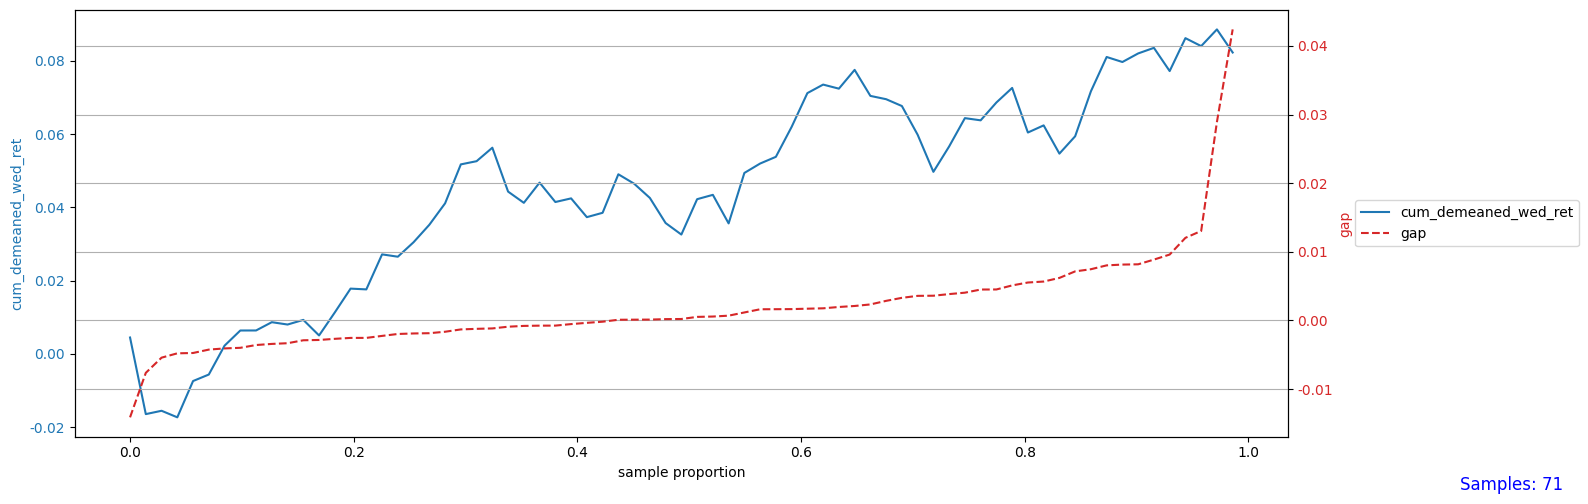

{'ly_max': None, 'ly_point': None, 'ry_point': None}

In [583]:
"""plot"""
sorted_plot(right_df, "index", ly = "cum_demeaned_wed_ret", ry = "gap")

# 週結算 target: thu

## read

In [436]:
base_df = pd.read_csv("TX.csv", index_col = "Timestamp")
base_df.index = pd.to_datetime(base_df.index, format = "%Y-%m-%d")

## sum t - 1 週 ret, target: thu ret

In [468]:
operate_df = pd.DataFrame()

# 算 ret
temp_df = base_df.copy()
temp_df["daily_ret"] = (temp_df["Close"] / temp_df["Open"]) - 1

# t - 1 週報酬
operate_df["sum_ret"] = temp_df.groupby("weekly_group")["daily_ret"].sum().rename("sum_ret")
operate_df = operate_df[: -1]
operate_df.index = pd.to_datetime(operate_df.index, format = "%Y-%m-%d")

# get thu index
all_date = temp_df.index
settle_date = list(temp_df["weekly_group"].unique())
target_pos = all_date.searchsorted(settle_date, side = "right")
target_pos = target_pos[: -1]

# t 週第一跟根報酬
thu_ret = (temp_df["Close"].iloc[target_pos] / temp_df["Open"].iloc[target_pos]) - 1
operate_df["thu_ret"] = thu_ret.values

# demeaning
mean = operate_df["thu_ret"].mean()
operate_df["demeaned_thu_ret"] = operate_df["thu_ret"] - mean
operate_df

,sum_ret,thu_ret,demeaned_thu_ret
weekly_group,,,
2015-01-07,-0.007558,0.015467,0.015632
2015-01-14,0.003469,0.000871,0.001036
2015-01-21,-0.000918,0.002991,0.003156
2015-01-28,0.010701,-0.007265,-0.007101
2015-02-04,-0.007758,-0.000735,-0.000570
...,...,...,...
2025-08-13,0.017422,-0.003575,-0.003410
2025-08-20,-0.016003,0.005184,0.005348
2025-08-27,0.014493,-0.005337,-0.005172


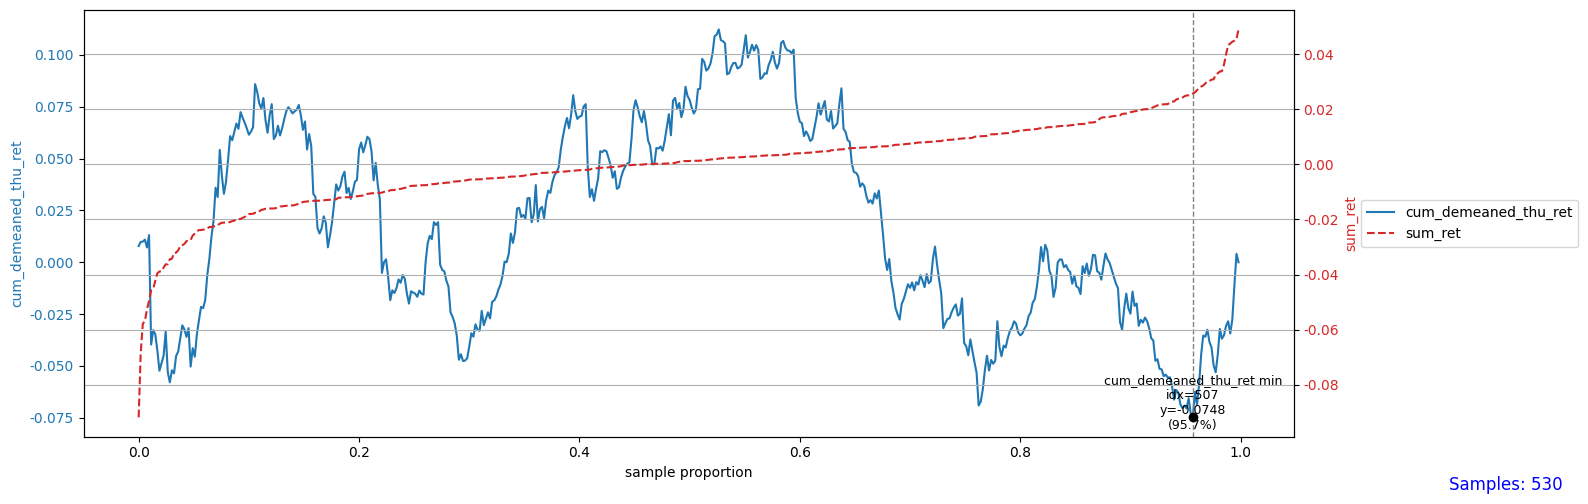

{'ly_max': None,
 'ly_point': None,
 'ry_point': None,
 'ly_min': {'index': 507,
  'rank': 508,
  'proportion': 0.9566037735849057,
  'x': 0.9566037735849057,
  'y': -0.0747519579359811}}

In [473]:
"""sort, cumsum & plot"""
operate_df.sort_values("sum_ret", inplace = True)
operate_df.reset_index(drop = False, inplace = True)
operate_df["cum_demeaned_thu_ret"] = operate_df["demeaned_thu_ret"].cumsum()

sorted_plot(operate_df, "index", ly = "cum_demeaned_thu_ret", ry = "sum_ret", min_ly = True)

## sum 跳空

In [463]:
operate_df = pd.DataFrame()

temp_df = base_df.copy()
temp_df["cross_daily_ret"] = (temp_df["Open"].shift(-1) / temp_df["Close"]) - 1

# t - 1 週 ret sumation
operate_df["sum_cross_ret"] = temp_df.groupby("weekly_group")["cross_daily_ret"].sum()
operate_df = operate_df[: -1]

# 抓到結算隔天的idx
all_date = temp_df.index
settle_date = list(temp_df["weekly_group"].unique())
target_pos = all_date.searchsorted(settle_date, side = "right")
target_pos = target_pos[: -1]

# get target ret
thu_ret = (temp_df["Close"].iloc[target_pos] / temp_df["Open"].iloc[target_pos]) - 1
operate_df["thu_ret"] = thu_ret.values

# demeaning
mean = operate_df["thu_ret"].mean()
operate_df["demeaned_thu_ret"] = operate_df["thu_ret"] - mean
operate_df

,sum_cross_ret,thu_ret,demeaned_thu_ret
weekly_group,,,
2015-01-07,-0.005590,0.015467,0.015632
2015-01-14,0.004547,0.000871,0.001036
2015-01-21,0.019702,0.002991,0.003156
2015-01-28,0.003909,-0.007265,-0.007101
2015-02-04,0.010368,-0.000735,-0.000570
...,...,...,...
2025-08-13,0.010973,-0.003575,-0.003410
2025-08-20,-0.008960,0.005184,0.005348
2025-08-27,0.011881,-0.005337,-0.005172


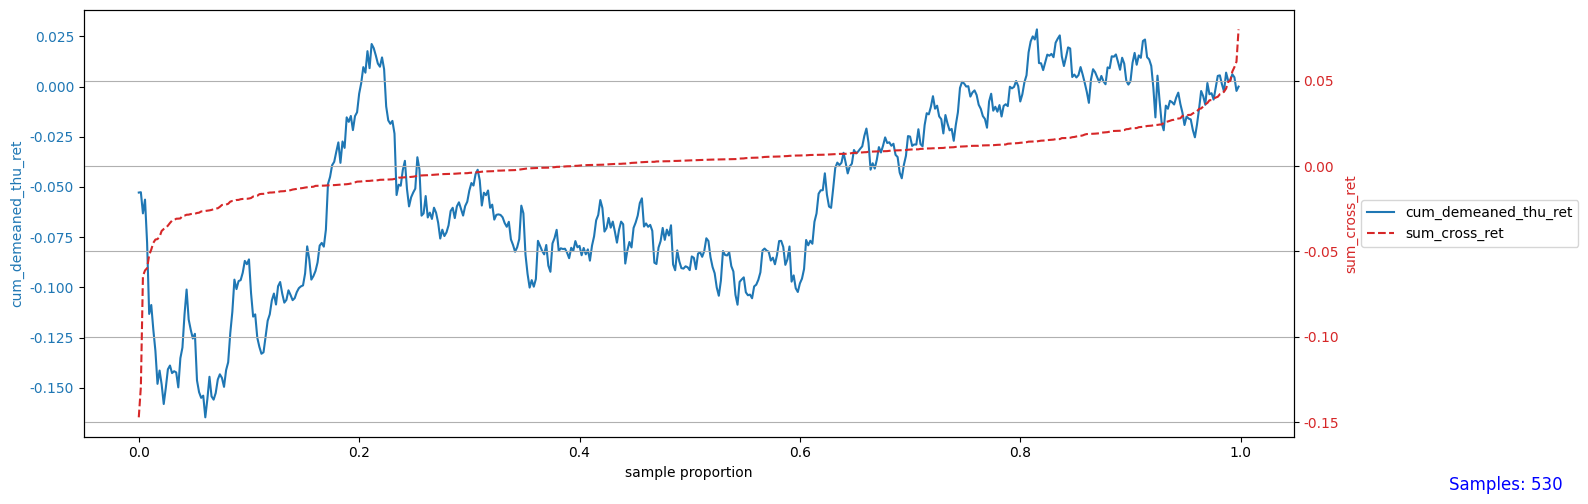

{'ly_max': None, 'ly_point': None, 'ry_point': None}

In [464]:
"""sort & cumsum & plot"""

operate_df.sort_values("sum_cross_ret", inplace = True)
operate_df.reset_index(drop = False, inplace = True)
operate_df["cum_demeaned_thu_ret"] = operate_df["demeaned_thu_ret"].cumsum()

sorted_plot(operate_df, "index", ly = "cum_demeaned_thu_ret", ry = "sum_cross_ret")

# 月結算 target: thu